In [ ]:
!python --version

Python 3.10.12


In [ ]:
!pip install split-folders
!pip install tensorflow


In [ ]:
import numpy as np
import pandas as pd
from PIL import Image
import splitfolders
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


image dimensions: [[194 185 186 ...  82  74  73]
 [193 182 181 ...  86  74  71]
 [197 186 184 ...  91  79  72]
 ...
 [ 96  65  61 ... 111 111 112]
 [ 97  65  62 ... 111 110 111]
 [ 97  65  60 ... 111 110 111]]


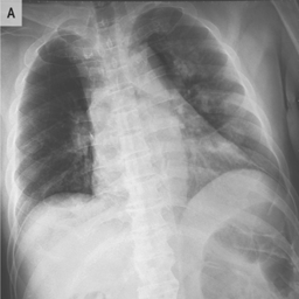

In [ ]:
covid_image_path = '/content/drive/MyDrive/Tecnicas/COVID/images/COVID-2.png'
covid_image = Image.open(covid_image_path)
print("image dimensions:", np.array(covid_image))
covid_image

image dimensions: (299, 299)
image mode: L


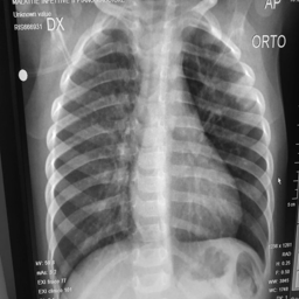

In [ ]:
covid_image_path = '/content/drive/MyDrive/Tecnicas/COVID/images/COVID-4.png'
covid_image = Image.open(covid_image_path)
print("image dimensions:", covid_image.size)
print("image mode:", covid_image.mode)
covid_image

In [ ]:
curr_dir = '/content/drive/MyDrive/Tecnicas/COVID/images'
cnt = 0
for file_name in os.listdir(curr_dir):
    file_path = os.path.join(curr_dir, file_name)
    covid_image = Image.open(file_path)
#     print(f"File name: {file_name}, Image mode: {covid_image.mode}")
    if covid_image.mode == 'RGB':
        cnt += 1
print(f'Numero de archivos RGB en Covid: {cnt}')

Number of RGB file in Viral Pneumonia: 0


In [ ]:
curr_dir = '/content/drive/MyDrive/Tecnicas/Normal/images'
cnt = 0
for file_name in os.listdir(curr_dir):
    file_path = os.path.join(curr_dir, file_name)
    covid_image = Image.open(file_path)
#     print(f"File name: {file_name}, Image mode: {covid_image.mode}")
    if covid_image.mode == 'RGB':
        cnt += 1
print(f'Numero de archivos RGB en Normal: {cnt}')

Numero de archivos RGB en Normal: 0


Copiar folderes de imagenes

In [ ]:
import shutil
import os

# path to source directory
src_dir = '/content/drive/MyDrive/Tecnicas/Normal/images'

# path to destination directory
dest_dir = '/content/drive/MyDrive/Tecnicas/NotMasked/Normal'

# getting all the files in the source directory
files = os.listdir(src_dir)

shutil.copytree(src_dir, dest_dir)

'/content/drive/MyDrive/Tecnicas/NotMasked/Normal'

image dimensions: (299, 299)
image mode: L


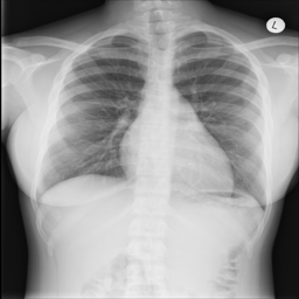

In [ ]:
covid_image_path = '/content/drive/MyDrive/Tecnicas/NotMasked/Normal/Normal-2.png'
covid_image = Image.open(covid_image_path)
print("image dimensions:", covid_image.size)
print("image mode:", covid_image.mode)
covid_image

In [ ]:
import shutil
import os

# path to source directory
src_dir = '/content/drive/MyDrive/Tecnicas/COVID/images'

# path to destination directory
dest_dir = '/content/drive/MyDrive/Tecnicas/NotMasked/Covid'

# getting all the files in the source directory
files = os.listdir(src_dir)

shutil.copytree(src_dir, dest_dir)

'/content/drive/MyDrive/Tecnicas/NotMasked/Covid'

Mascaras

Splitting

In [ ]:
import splitfolders
import os
path = "/content/drive/MyDrive/Tecnicas/NotMasked"
print(os.listdir(path))

['Normal', 'Covid']


In [ ]:
path = "/content/drive/MyDrive/Tecnicas/NotMasked"
splitfolders.ratio(path,seed=50, output="/content/drive/MyDrive/Tecnicas/RadiografiasNotMasked", ratio=(0.8, 0.1, 0.1))

Copying files: 13809 files [05:53, 39.02 files/s]


In [ ]:
path = "/content/drive/MyDrive/Tecnicas/RadiografiasNotMasked"
print(os.listdir(path))

['train', 'val', 'test']


In [ ]:
path = "/content/drive/MyDrive/Tecnicas/RadiografiasNotMasked/train"
print(os.listdir(path))

['Normal', 'Covid']


In [ ]:
train_dir = '/content/drive/MyDrive/Tecnicas/RadiografiasNotMasked/train'
val_dir = '/content/drive/MyDrive/Tecnicas/RadiografiasNotMasked/val'
test_dir = '/content/drive/MyDrive/Tecnicas/RadiografiasNotMasked/test'

In [ ]:
path = "/content/drive/MyDrive/Tecnicas/RadiografiasNotMasked/val"
print(os.listdir(path))

['Normal', 'Covid']


In [ ]:
from itertools import chain
from matplotlib import pyplot as plt

unique_dimensions = set()
unique_modes = set()

for subdir in chain(os.listdir(train_dir), os.listdir(test_dir), os.listdir(val_dir)):
    subdir_path = os.path.join(train_dir, subdir)
    for filename in os.listdir(subdir_path):
        file_path = os.path.join(subdir_path, filename)
        image = Image.open(file_path)
        unique_dimensions.add(image.size[0])
        unique_dimensions.add(image.size[1])
        unique_modes.add(image.mode)

print("unique modes:", unique_modes)
print("unique dimensions:", unique_dimensions)

unique modes: {'L'}
unique dimensions: {299}


image dimensions: (299, 299)
image mode: L


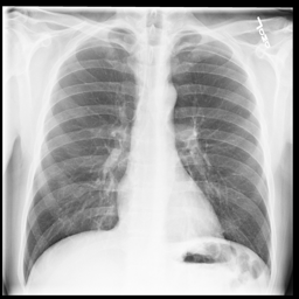

In [ ]:
covid_image_path = '/content/drive/MyDrive/Tecnicas/RadiografiasNotMasked/train/Normal/Normal-10190.png'
covid_image = Image.open(covid_image_path)
print("image dimensions:", covid_image.size)
print("image mode:", covid_image.mode)
covid_image

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(256, 256),
        color_mode='grayscale',
        class_mode='binary')

valid_generator = valid_datagen.flow_from_directory(
        val_dir,
        target_size=(256, 256),
        color_mode='grayscale',
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(256, 256),
        color_mode='grayscale',
        class_mode='binary',
        shuffle=False)

Found 11046 images belonging to 2 classes.
Found 1380 images belonging to 2 classes.
Found 1383 images belonging to 2 classes.


Red neuronal

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Activation, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras import backend

In [ ]:
def onelayercnn():
    backend.clear_session()
    cnn1 = Sequential()
    cnn1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(256, 256, 1)))
    cnn1.add(MaxPooling2D(pool_size=(2, 2)))
    cnn1.add(Flatten())
    cnn1.add(Dense(128, activation='relu'))
    cnn1.add(Dense(1, activation='sigmoid'))
    cnn1.summary()
    return cnn1

In [ ]:
cnn1 = onelayercnn()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 516128)            0         
                                                                 
 dense (Dense)               (None, 128)               66064512  
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 66064961 (252.02 MB)
Trainable params: 66064961 (252.02 MB)
Non-trainable params: 0 (0.00 Byte)
____________

In [ ]:
cnn1.compile(loss='binary_crossentropy',
              optimizer="Adam",
              metrics=['accuracy'])

In [ ]:

EPOCHS = 10
history = cnn1.fit(
      train_generator,
      validation_data=valid_generator,
      epochs=EPOCHS,
      verbose=1)

Epoch 1/10
346/346 [==============================] - 99s 284ms/step - loss: 0.6174 - accuracy: 0.8659 - val_loss: 0.2274 - val_accuracy: 0.9080
Epoch 2/10
346/346 [==============================] - 48s 139ms/step - loss: 0.1765 - accuracy: 0.9355 - val_loss: 0.2192 - val_accuracy: 0.9109
Epoch 3/10
346/346 [==============================] - 48s 139ms/step - loss: 0.1149 - accuracy: 0.9603 - val_loss: 0.1757 - val_accuracy: 0.9326
Epoch 4/10
346/346 [==============================] - 49s 142ms/step - loss: 0.0755 - accuracy: 0.9739 - val_loss: 0.1908 - val_accuracy: 0.9326
Epoch 5/10
346/346 [==============================] - 49s 141ms/step - loss: 0.0543 - accuracy: 0.9823 - val_loss: 0.1932 - val_accuracy: 0.9362
Epoch 6/10
346/346 [==============================] - 48s 139ms/step - loss: 0.0408 - accuracy: 0.9868 - val_loss: 0.2008 - val_accuracy: 0.9420
Epoch 7/10
346/346 [==============================] - 48s 138ms/step - loss: 0.0341 - accuracy: 0.9885 - val_loss: 0.2228 - val_ac

In [ ]:
y_true = test_generator.labels
y_pred = cnn1.predict(test_generator)
y_pred = np.round(y_pred)
print(classification_report(y_true, y_pred,digits=4))

44/44 [==============================] - 5s 119ms/step
              precision    recall  f1-score   support

           0     0.8215    0.9256    0.8705       363
           1     0.9723    0.9284    0.9498      1020

    accuracy                         0.9277      1383
   macro avg     0.8969    0.9270    0.9102      1383
weighted avg     0.9327    0.9277    0.9290      1383



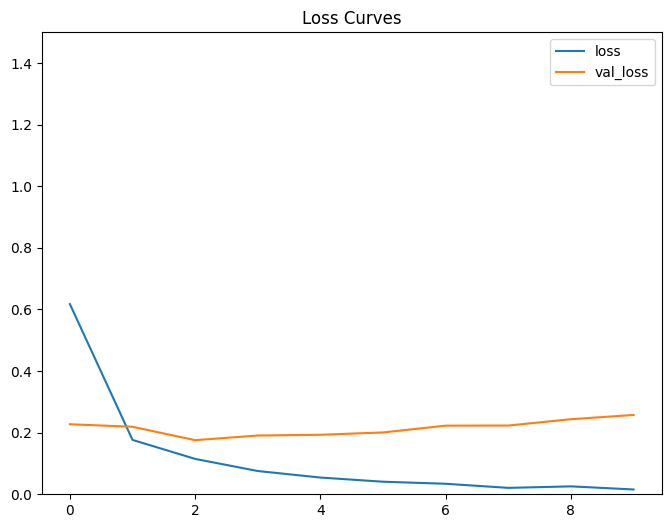

In [ ]:
plt.figure(figsize=(8,6))
plt.title("Loss Curves")
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.ylim([0,1.5])
plt.legend()
plt.show()

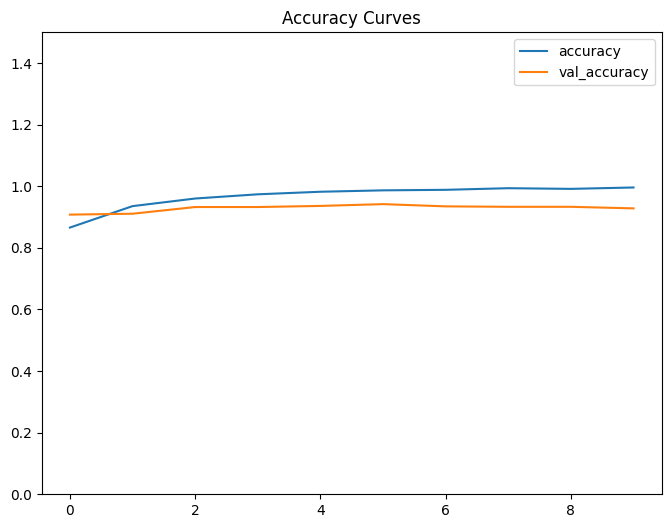

In [ ]:
plt.figure(figsize=(8,6))
plt.title("Accuracy Curves")
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.ylim([0,1.5])
plt.legend()
plt.show()

In [ ]:
pathcov = "/content/drive/MyDrive/Tecnicas/RadiografiasNotMasked/train/Covid"
pathnorm = "/content/drive/MyDrive/Tecnicas/RadiografiasNotMasked/train/Normal"
lst1 = os.listdir(pathcov) # your directory path
number_files1 = len(lst1)
lst2 = os.listdir(pathnorm) # your directory path
number_files2 = len(lst2)
print("Datos entrenamiento COVID:" ,number_files1,"Datos entrenamiento Normal:",number_files2)

Datos entrenamiento COVID: 2892 Datos entrenamiento Normal: 8154


In [ ]:
pathcov = "/content/drive/MyDrive/Tecnicas/RadiografiasNotMasked/val/Covid"
pathnorm = "/content/drive/MyDrive/Tecnicas/RadiografiasNotMasked//val/Normal"
lst1 = os.listdir(pathcov) # your directory path
number_files1 = len(lst1)
lst2 = os.listdir(pathnorm) # your directory path
number_files2 = len(lst2)
print("Datos validacion COVID:" ,number_files1,"Datos validacion Normal:",number_files2)

Datos validacion COVID: 361 Datos validacion Normal: 1019


In [ ]:
pathcov = "/content/drive/MyDrive/Tecnicas/RadiografiasNotMasked/test/Covid"
pathnorm = "/content/drive/MyDrive/Tecnicas/RadiografiasNotMasked/test/Normal"
lst1 = os.listdir(pathcov) # your directory path
number_files1 = len(lst1)
lst2 = os.listdir(pathnorm) # your directory path
number_files2 = len(lst2)
print("Datos validacion COVID:" ,number_files1,"Datos validacion Normal:",number_files2)

Datos validacion COVID: 363 Datos validacion Normal: 1020


Referencias

https://www.kaggle.com/code/b08902026jimmy/covid-roentgen-cnn-categorical-classification
